In [4]:
import numpy as np
import fur.path_assistant as path_assistant
from config import get_from_config
from transmission_data import transmission_function

In [5]:
Ex_3D = np.load(path_assistant.srw_Ex_3D_file_path)

In [ ]:
1/3.5/3.5*(0.001505016722408027*4.965786901270772e-05*4.968329804187636e-05)*np.sum(np.absolute(Ex_3D)**2)

In [2]:
rad_mesh = get_from_config("radiation_mesh")
ls = rad_mesh[2][0]
lf = rad_mesh[2][1]
lbins = rad_mesh[2][2]
l_list = np.linspace(ls, lf, lbins)

In [3]:
rad_mesh

[[-0.0254, 0.0254, 1024],
 [-0.017960512242138304, 0.017960512242138304, 724],
 [0.85, 1.3, 300]]

In [6]:
spectral_transmission = np.sqrt(transmission_function(l_list))

In [7]:
Ex_3D = spectral_transmission[:, None, None]*Ex_3D

In [8]:
(0.001505016722408027*4.965786901270772e-05*4.968329804187636e-05)*np.sum(np.absolute(Ex_3D))

0.005014624673941403

In [9]:
np.save(path_assistant.srw_Ex_3D_with_losses_file_path, Ex_3D)

In [10]:
Ey_3D = np.load(path_assistant.srw_Ey_3D_file_path)

In [11]:
Ey_3D = spectral_transmission[:, None, None]*Ey_3D

In [12]:
np.save(path_assistant.srw_Ey_3D_with_losses_file_path, Ey_3D)

In [3]:
Ex_3D_with_losses = np.load(path_assistant.srw_Ex_3D_with_losses_file_path)

In [4]:
1/3.5/3.5*(0.001505016722408027*4.965786901270772e-05*4.968329804187636e-05)*np.sum(np.absolute(Ex_3D_with_losses)**2)

0.008969806532204652

In [5]:
732*1024*300

224870400

In [6]:
i3d = np.absolute(Ex_3D)**2

In [10]:
i2d = np.sum(i3d, axis=0)

In [9]:
import matplotlib.pyplot as plt

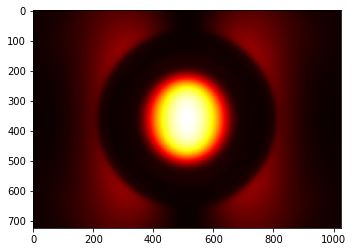

In [11]:
plt.imshow(i2d, cmap='hot', interpolation='nearest')
plt.show()

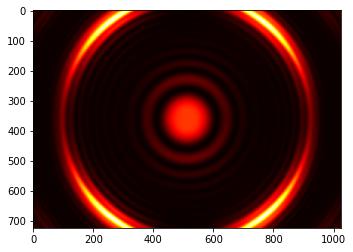

In [21]:
plt.imshow(i3d[150,:,:], cmap='hot', interpolation='nearest')
plt.show()